In [153]:
import pandas as pd
df=pd.read_csv('C:/Users/Abhishek Mukherjee/Downloads/train (1).csv')

In [154]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [155]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [156]:
df['location'].isna().sum()

2533

In [157]:
len(df)

7613

In [257]:

temp=[]
[temp.append(df['location'][i]) for i in range(len(df['target'])) if df['target'][i]==1]
tempLst=[]
tempPrime=[]


In [258]:
def removNone(tempVal):
    
    if isinstance(tempVal,float):
        return ''
    if tempVal!='nan' and tempVal!='None':
        return tempVal

tempLst=list(filter(removNone,temp))

In [259]:
removWords=['Gangsta OC / MV RP; 18+.','Earth: Senseless nonsense ','austin follows*','Primum non nocere','No VOTE',' -99.047821',
'|| c h i c a g o ||','CA physically- Boston Strong','No VOTE','unless there','USA....Draenor','Whole Worl',
'N','shoujo hel','SWinfo@dot.state.al.us','.','&','-75.488849','westwestwestwestwestwestwest','TonyJ@Centralizedhockey.com','',' ',
'+254\å¡_å¡_å¡_/','I #2MBikers','iTunes','-99.047821 ','|| || ','@Dollarocracy','http://www.amazon.com/dp/B00HR','153.011072'
           ,'http://twitch.tv/jcmonkey','EST. 2012 -','304']


In [260]:

def funcMatPatrn(tempLst):
    
    matPatrn='\s*\?+\s*|\s*\!+\s*|\s+([a-zA-Z]+)|\s+([a-zA-Z]+\s+[a-zA-Z]+)'

    temp=[]
    tempTildaPrime=[]
    Idx=[]
    
    import re
    
    for i in range(len(tempLst)):
        temp=[]
        temp=re.sub(matPatrn,'',tempLst[i])
       # print(tempLst[i])
        
        #if 'South' in tempLst[i]:
        #    print(tempLst[i])
            
        if temp=='New' or temp=='The' or temp=='United' or temp=='IN' or temp=='In' or temp.upper()=='.c.' or temp.upper()=='SAN' or 'SOUTH' in temp:
            tempTildaPrime.append(tempLst[i].upper())
            continue
        
        temp2=re.split(',',temp)
        temp3=temp2[len(temp2)-1]
        if isinstance(temp3,str):
            tempTilda=temp3.replace(' ','')
            if len(tempTilda)!=0 and tempTilda not in removWords:
                tempTildaPrime.append(temp3.upper())
                
    return tempTildaPrime   



In [261]:
def wordCount(tempTildaPrime):
    wordCountDict=dict()
    for i in tempTildaPrime:
        if i not in wordCountDict.keys():
            wordCountDict.update({i:1})
        else:
            wordCountDict[i]+=1
    

    return wordCountDict

In [262]:
tempTildaPrime=funcMatPatrn(tempLst)
tempCount=wordCount(tempTildaPrime)
temp=tempCount['USA']+tempCount['UNITED STATES']
tempCount.update({'USA':temp})
tempCount.pop('UNITED STATES')
tempCount.pop('.C.')
temp=tempCount['EVERYWHERE']+tempCount['WORLDWIDE']
tempCount.update({'WORLDWIDE':temp})
tempCount.pop('EVERYWHERE')
tempDict=sorted(tempCount.items(),key= lambda x:x[1],reverse=True)
print(tempDict)

[('USA', 94), ('NIGERIA', 25), ('WORLDWIDE', 24), ('INDIA', 23), ('MUMBAI', 20), ('LONDON', 19), ('UK', 17), ('CANADA', 17), ('NEW YORK', 16), ('WORLD', 11), ('AUSTRALIA', 9), ('INDONESIA', 9), ('SOMEWHERE', 9), ('EARTH', 9), ('LOS', 9), ('US', 8), ('NORTH', 7), ('TORONTO', 7), ('CALIFORNIA', 7), ('CHICAGO', 7), ('WASHINGTON', 7), ('GLOBAL', 6), ('KARACHI', 6), ('NEW YORK CITY', 6), ('SYDNEY', 6), ('IRELAND', 6), ('LAGOS', 6), ('PLANET', 6), ('SAN FRANCISCO', 6), ('BIRMINGHAM', 5), ('AFRICA', 5), ('ITALY', 5), ('WEST', 5), ('SEATTLE', 5), ('IN', 5), ('MELBOURNE', 5), ('KENYA', 5), ('PEDOPHILE', 5), ('SOUTH', 4), ('NYC', 4), ('PUERTO', 4), ('NY', 4), ('SCOTLAND', 4), ('NIGERIA ', 4), ('UNITED KINGDOM', 4), ('SACRAMENTO', 4), ('TEXAS', 4), ('TENNESSEE', 4), ('MAD', 4), ('NAIROBI-KENYA', 4), ('CALGARY', 4), ('MIDWEST', 4), ("JAKARTA/KUALA/S'PORE", 4), ('HOUSTON', 4), ('THE NETHERLANDS', 4), ('CHARLOTTE', 3), ('PENNSYLVANIA', 3), ('FINANCIAL', 3), ('CA', 3), ('REPUBLIC', 3), ('AMERICA', 3)

In [263]:
tempPrime=list(map(lambda temp:temp[0],tempDict))
tempPrime2=list(map(lambda temp:temp[1],tempDict))

keys=tempPrime[:10]
vals=tempPrime2[:10]

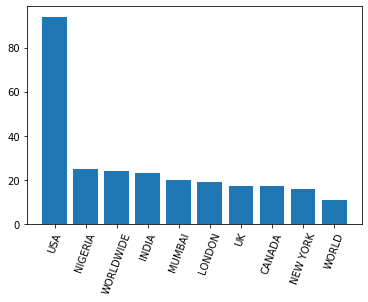

In [264]:
#For the 'Real' category
import matplotlib.pyplot as plt
plt.bar(keys,vals)
plt.tick_params(axis='x', rotation=70)
plt.show()

In [265]:
temp=[]
[temp.append(df['location'][i]) for i in range(len(df['target'])) if df['target'][i]==0]
tempLst=[]
tempPrime=[]

tempLst=list(filter(removNone,temp))

In [266]:
tempTildaPrime=funcMatPatrn(tempLst)
tempCount=wordCount(tempTildaPrime)
temp=tempCount['USA']+tempCount['UNITED STATES']
tempCount.update({'USA':temp})
tempCount.pop('UNITED STATES')
tempCount.pop('EVERYWHERE')
temp=tempCount['NEW YORK']+tempCount['NYC']
tempCount.update({'NEW YORK':temp})
tempCount.pop('NYC')
tempCount.pop('SOUTH')
temp=tempCount['UNITED KINGDOM']+tempCount['UK']
tempCount.update({'UK':temp})
tempCount.pop('UNITED KINGDOM')
tempDict=sorted(tempCount.items(),key= lambda x:x[1],reverse=True)
print(tempDict)

[('NEW YORK', 68), ('USA', 62), ('LONDON', 34), ('UK', 23), ('CANADA', 18), ('KENYA', 16), ('FLORIDA', 14), ('WORLDWIDE', 13), ('CALIFORNIA', 13), ('TEXAS', 9), ('SS', 9), ('AUSTRALIA', 9), ('SEATTLE', 9), ('WORLD', 9), ('SAN FRANCISCO', 8), ('CHICAGO', 8), ('NORTH', 8), ('SOMEWHERE', 7), ('LOS', 7), ('NIGERIA', 7), ('MY', 7), ('MANCHESTER', 7), ('TORONTO', 6), ('IRELAND', 6), ('.C.', 6), ('INDIANA', 6), ('INDIA', 6), ('INDONESIA', 6), ('CHINA', 6), ('MUMBAI', 5), ('COLORADO', 5), ('ATLANTA', 5), ('WISCONSIN', 5), ('THE', 5), ('NY', 5), ('A', 5), ('ALL', 5), ('SOMEWHERE ', 5), ('VANCOUVER', 5), ('COVENTRY', 5), ('SOUTHERN', 5), ('SWITZERLAND', 4), ('HAPPILY 2 ', 4), ('NEW YORK CITY', 4), ('EAST', 4), ('BRASIL', 4), ('RIO', 4), ('SCOTLAND', 4), ('ONTARIO', 4), ('SINGAPORE', 4), ('OKLAHOMA', 4), ('GLOBAL', 4), ('CA', 4), ('ON', 4), ('OREGON', 4), ('TENNESSEE', 4), ('KANSAS', 4), ('EDINBURGH', 4), ('NEWCASTLE', 4), ('LAGOS', 4), ('SOME', 4), ('IN ', 4), ('WHERE', 4), ('NEW JERSEY', 4), ('

In [267]:
tempPrime=list(map(lambda temp:temp[0],tempDict))
tempPrime2=list(map(lambda temp:temp[1],tempDict))

In [268]:
keys=tempPrime[:10]
vals=tempPrime2[:10]

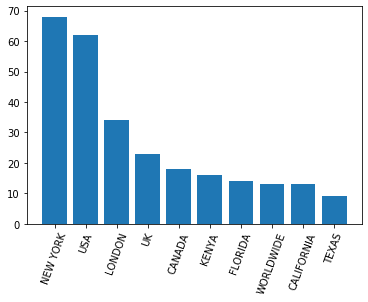

In [269]:
#For the 'fake' category
import matplotlib.pyplot as plt
plt.bar(keys,vals)
plt.tick_params(axis='x', rotation=70)
plt.show()